In [10]:
import gurobipy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('stocks2019.csv', index_col='X')
df.sample(5)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-12-24,8699.509766,58.425743,329.640015,46.540001,110.279999,277.890015,1344.430054,1343.560059,1789.209961,237.413879,...,34.470001,252.490005,192.750000,148.436371,220.559998,56.545940,166.190002,60.941479,61.655396,97.278679
2019-03-27,7308.189941,45.222580,262.339996,24.889999,134.600006,268.959991,1178.010010,1173.020020,1765.699951,178.522629,...,42.310001,346.049988,180.179993,130.503464,185.820007,58.819824,189.679993,43.070049,54.730610,122.297935
2019-08-06,7521.319824,46.285587,286.209991,28.860001,109.389999,188.440002,1171.079956,1169.949951,1787.829956,178.262085,...,33.990002,340.279999,204.360001,151.088699,176.940002,49.041580,187.330002,52.008862,58.513962,103.958481
2019-02-01,6875.520020,45.345116,247.380005,24.510000,126.279999,244.000000,1118.619995,1110.750000,1626.229980,177.865952,...,33.529999,291.359985,170.520004,117.364388,191.520004,67.528275,186.059998,44.607590,49.784798,109.118263
2019-09-26,7771.990234,53.865734,283.809998,29.469999,98.699997,178.990005,1242.290039,1241.390015,1739.839966,190.152847,...,29.809999,236.309998,191.190002,158.236664,169.550003,52.020447,174.440002,59.987820,63.900158,95.674072


In [12]:
returns = df / df.shift(1)
returns = returns[1:]
returns.sample(5)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-04-29,1.001579,1.005192,1.014825,0.993185,1.005350,0.998490,1.014701,1.012105,0.993746,0.998347,...,1.016867,0.980332,0.988042,1.003575,0.998091,1.013434,1.000489,0.991163,0.991595,0.984445
2019-09-30,1.008835,1.011274,0.995352,1.009401,1.001739,1.028890,0.996077,0.995029,1.006062,0.992665,...,1.009304,1.025573,1.007370,1.016389,1.016073,1.016541,1.007768,0.985948,0.992809,0.999479
2019-11-15,1.006986,1.014042,1.010084,1.005476,1.023421,1.013362,1.018630,1.017850,0.991388,1.010801,...,0.994888,1.014123,0.997650,1.001063,1.023415,1.010702,1.007160,0.999206,0.992985,1.005475
2019-12-12,1.007650,1.036827,1.007309,1.079047,1.027123,0.975148,1.003154,1.003903,1.006639,1.008461,...,1.038786,1.028732,1.000263,1.005800,1.002500,1.009826,0.968121,1.052085,0.987130,1.028443
2019-02-14,1.000932,1.019295,0.999654,1.012254,1.005991,0.995632,1.000505,1.001348,0.989421,0.995467,...,0.996162,1.003454,1.004762,0.999354,1.002537,1.001667,1.004208,1.006081,1.000000,1.001107


In [13]:
correlation = returns.iloc[:,1:].corr()
correlation

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


# Question 2

## Stock selection

In [14]:
n = len(correlation)
m = 5
dec_var = n + n*n

In [15]:
obj = np.array([0] * n + np.array(correlation).flatten().tolist())

# We are initializing the constraint matrix
eq = 1 + n + n*n
var = dec_var
A = np.zeros((eq, var))                    
b = np.zeros(eq)
sense = np.array(['<'] * eq )
vtype = ['B'] * dec_var

A[0,:n] = 1

for i in range(n):
    A[1 + i, n + i*n : n + i*n + n] = 1

for i in range(n):
    for j in range(n):
        A[1 + n + i*n + j, n + n*i + j] = 1
        A[1 + n + i*n + j, j] = -1

b[0] = m
b[1:n] = 1
sense[:n] = '='

print(obj)

#for i in range(eq):
    #print(A[i,], sense[i], b[i])

[ 0.          0.          0.         ...  0.516958   -0.11755175
  1.        ]


In [16]:
opModel = gp.Model()

opModX = opModel.addMVar(len(obj), vtype=vtype)

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

opModel.Params.OutputFlag = 0
opModel.optimize()  

print(opModel.objVal)
print(opModX.x)

Academic license - for non-commercial use only - expires 2022-08-25
Using license file /Users/abhinavsharma/gurobi.lic
54.199120202352304
[-0. -0.  0. ...  0.  0.  0.]


In [17]:
print("Stocks chosen:")
stocks_chosen = []
for i in range(n):
    if opModX.x[i] == 1:
        print(correlation.index[i])
        stocks_chosen = stocks_chosen + [i]

Stocks chosen:
LBTYK
MXIM
MSFT
VRTX
XEL


## Portofolio Weights 

In [18]:
obj = np.array([0] * m + [1] * len(returns))

# We are initializing the constraint matrix
eq = 1 + (len(returns) * 2)
var = m + len(returns)
A = np.zeros((eq, var))                     
b = np.zeros(eq)
sense = np.array(['<'] * eq )

A[0,:m] = 1
b[0] = 1
sense[0] = '='

for i in range(len(returns)):
    for j in range(m):
        A[2*i + 1, j] = returns.iloc[i, stocks_chosen[j]+1]
        A[2*i + 2, j] = returns.iloc[i, stocks_chosen[j]+1]
    A[2*i + 1, 5 + i] = 1
    A[2*i + 2, 5 + i] = -1
    b[2*i + 1] = returns['NDX'].iloc[i]
    b[2*i + 2] = returns['NDX'].iloc[i]
    sense[2*i + 1] = '>'
    sense[2*i + 2] = '<'

print(obj)

#for i in range(eq):
    #print(A[i,], sense[i], b[i])

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
opModel = gp.Model()

opModX = opModel.addMVar(len(obj))

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

opModel.Params.OutputFlag = 0
opModel.optimize()  

print(opModel.objVal)
print("Weights")
print(opModX.x[:m])

weights = opModX.x[:m]

0.7891782824631466
Weights
[0.04886175 0.21038806 0.58035198 0.07119022 0.089208  ]


In [20]:
returns['portfolio'] = 0

for i in range(m):
    returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, stocks_chosen[i]+1]

In [21]:
returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
returns['portfolio_performance'] = returns['portfolio_performance'].abs()
print("Performance on 2019 stocks - ", returns['portfolio_performance'].sum())

Performance on 2019 stocks -  0.7891782824631449


In [22]:
df_20 = pd.read_csv('stocks2020.csv', index_col=0)


returns_20 = df_20 / df_20.shift(1)
returns_20 = returns_20[1:]

In [23]:
returns_20['portfolio'] = 0

for i in range(m):
    returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, stocks_chosen[i]+1]

returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())

Performance on 2020 stocks -  1.1124373455076444


# Task 3

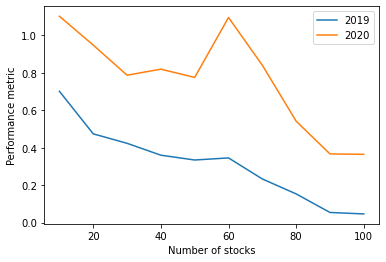

In [24]:
n = len(correlation)
dec_var = n + n*n
max_m = 100
min_m = 10
step = 10

performance_2019 = []
performance_2020 = []

for m in range(min_m, max_m + step, step):
    
    #print("\n------Portfoloio for ",m, "stocks---------------")
    
    ######### stock selection ########
    if m >= n:
        stocks_chosen = list(range(1,n+1))
        stock_name = correlation.index
    else:

        ### IP definition
        obj = np.array([0] * n + np.array(correlation).flatten().tolist())

        eq = 1 + n + n*n
        var = dec_var
        A = np.zeros((eq, var))                    
        b = np.zeros(eq)
        sense = np.array(['<'] * eq )
        vtype = ['B'] * dec_var

        A[0,:n] = 1

        for i in range(n):
            A[1 + i, n + i*n : n + i*n + n] = 1

        for i in range(n):
            for j in range(n):
                A[1 + n + i*n + j, n + n*i + j] = 1
                A[1 + n + i*n + j, j] = -1

        b[0] = m
        b[1:n] = 1
        sense[:n] = '='

        ## gurobi
        opModel = gp.Model()

        opModX = opModel.addMVar(len(obj), vtype=vtype)

        opModCon = opModel.addMConstrs(A, opModX, sense, b)
        opModel.setMObjective(None, obj, 0, sense=gp.GRB.MAXIMIZE)

        opModel.Params.OutputFlag = 0
        opModel.optimize()  
        
        ## stocks
        stocks_chosen = []
        stock_name = []
        for i in range(n):
            if opModX.x[i] == 1:
                stock_name = stock_name + [correlation.index[i]]
                stocks_chosen = stocks_chosen + [i]


    ######## portfolio management ########

    ### LP definition
    obj = np.array([0] * m + [1] * len(returns))

    # We are initializing the constraint matrix
    eq = 1 + (len(returns) * 2)
    var = m + len(returns)
    A = np.zeros((eq, var))                     
    b = np.zeros(eq)
    sense = np.array(['<'] * eq )

    A[0,:m] = 1
    b[0] = 1
    sense[0] = '='

    for i in range(len(returns)):
        for j in range(m):
            A[2*i + 1, j] = returns.iloc[i, stocks_chosen[j]+1]
            A[2*i + 2, j] = returns.iloc[i, stocks_chosen[j]+1]
        A[2*i + 1, m + i] = 1
        A[2*i + 2, m + i] = -1
        b[2*i + 1] = returns['NDX'].iloc[i]
        b[2*i + 2] = returns['NDX'].iloc[i]
        sense[2*i + 1] = '>'
        sense[2*i + 2] = '<'


    ## gurobi

    opModel = gp.Model()

    opModX = opModel.addMVar(len(obj))

    opModCon = opModel.addMConstrs(A, opModX, sense, b)
    opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

    opModel.Params.OutputFlag = 0
    opModel.optimize()  

    weights = opModX.x[:m]
    
    #print(pd.Series(weights, index = stock_name))

    returns['portfolio'] = 0

    for i in range(m):
        returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, stocks_chosen[i]+1]

    returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
    returns['portfolio_performance'] = returns['portfolio_performance'].abs()
    #print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())
    performance_2019 = performance_2019 + [returns['portfolio_performance'].sum()]
    
    returns_20['portfolio'] = 0

    for i in range(m):
        returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, stocks_chosen[i]+1]

    returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
    returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
    #print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())
    performance_2020 = performance_2020 + [returns_20['portfolio_performance'].sum()]

    
plt.plot(range(min_m, max_m + step, step), performance_2019, label = '2019')
plt.plot(range(min_m, max_m + step, step), performance_2020, label = '2020')
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Performance metric')
plt.show()

# Task 4

### Task 4 - Task 2

In [25]:
m = 5

# weights + ON variables + returns
obj = np.array([0] * n + [0] * n + [1] * len(returns))

vtype = ['C'] * n + ['B'] * n + ['C'] * len(returns)

eq = 1 + 1 + n + (len(returns) * 2)
var = n + n + len(returns)
A = np.zeros((eq, var))                     
b = np.zeros(eq)
sense = np.array(['<'] * eq )

# sum of weights is 1
A[0,:n] = 1
b[0] = 1
sense[0] = '='

# Total number of stocks < m
A[1, n : 2*n] = 1
b[1] = m
sense[1] = '='

# wi > 0 iff yi > 0 ==> wi < yi ==> wi - yi < 0
for i in range(n):
    A[2 + i, i] = 1
    A[2 + i, i + n] = -1

# follow the index
for i in range(len(returns)):
    for j in range(n):
        A[2*i + 1 + n + 1, j] = returns.iloc[i, j+1]
        A[2*i + 2 + n + 1, j] = returns.iloc[i, j+1]
    A[2*i + 1 + n + 1, n + n + i] = 1
    A[2*i + 2 + n + 1, n + n + i] = -1
    b[2*i + 1 + n + 1] = returns['NDX'].iloc[i]
    b[2*i + 2 + n + 1] = returns['NDX'].iloc[i]
    sense[2*i + 1 + n + 1] = '>'
    sense[2*i + 2 + n + 1] = '<'

opModel = gp.Model()

opModX = opModel.addMVar(len(obj), vtype = vtype)

opModCon = opModel.addMConstrs(A, opModX, sense, b)
opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

opModel.Params.OutputFlag = 0
opModel.Params.TimeLimit = 30
opModel.optimize()  

weights = opModX.x[:n]

returns['portfolio'] = 0

for i in range(n):
    returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, i+1]

returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
returns['portfolio_performance'] = returns['portfolio_performance'].abs()
print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())

returns_20['portfolio'] = 0

for i in range(n):
    returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, i+1]

returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())


Performance on 2019 stocks -  0.5189321485288072
Performance on 2020 stocks -  0.9287522556943143


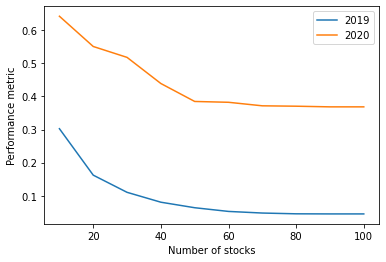

In [26]:
max_m = 100
min_m = 10
step = 10

performance_2019 = []
performance_2020 = []

for m in range(min_m, max_m + step, step):
    # weights + ON variables + returns
    obj = np.array([0] * n + [0] * n + [1] * len(returns))

    vtype = ['C'] * n + ['B'] * n + ['C'] * len(returns)

    eq = 1 + 1 + n + (len(returns) * 2)
    var = n + n + len(returns)
    A = np.zeros((eq, var))                     
    b = np.zeros(eq)
    sense = np.array(['<'] * eq )

    # sum of weights is 1
    A[0,:n] = 1
    b[0] = 1
    sense[0] = '='

    # Total number of stocks < m
    A[1, n : 2*n] = 1
    b[1] = m
    sense[1] = '='

    # wi > 0 iff yi > 0 ==> wi < yi ==> wi - yi < 0
    for i in range(n):
        A[2 + i, i] = 1
        A[2 + i, i + n] = -1

    # follow the index
    for i in range(len(returns)):
        for j in range(n):
            A[2*i + 1 + n + 1, j] = returns.iloc[i, j+1]
            A[2*i + 2 + n + 1, j] = returns.iloc[i, j+1]
        A[2*i + 1 + n + 1, n + n + i] = 1
        A[2*i + 2 + n + 1, n + n + i] = -1
        b[2*i + 1 + n + 1] = returns['NDX'].iloc[i]
        b[2*i + 2 + n + 1] = returns['NDX'].iloc[i]
        sense[2*i + 1 + n + 1] = '>'
        sense[2*i + 2 + n + 1] = '<'

    opModel = gp.Model()

    opModX = opModel.addMVar(len(obj), vtype = vtype)

    opModCon = opModel.addMConstrs(A, opModX, sense, b)
    opModel.setMObjective(None, obj, 0, sense=gp.GRB.MINIMIZE)

    opModel.Params.OutputFlag = 0
    opModel.Params.TimeLimit = 3600
    opModel.optimize()  

    weights = opModX.x[:n]

    returns['portfolio'] = 0

    for i in range(n):
        returns['portfolio'] = returns['portfolio'] + weights[i] * returns.iloc[:, i+1]

    returns['portfolio_performance'] = returns['NDX'] - returns['portfolio']
    returns['portfolio_performance'] = returns['portfolio_performance'].abs()
    #print("\nPerformance on 2019 stocks - ", returns['portfolio_performance'].sum())
    performance_2019 = performance_2019 + [returns['portfolio_performance'].sum()]

    returns_20['portfolio'] = 0

    for i in range(n):
        returns_20['portfolio'] = returns_20['portfolio'] + weights[i] * returns_20.iloc[:, i+1]

    returns_20['portfolio_performance'] = returns_20['NDX'] - returns_20['portfolio']
    returns_20['portfolio_performance'] = returns_20['portfolio_performance'].abs()
    #print("Performance on 2020 stocks - ", returns_20['portfolio_performance'].sum())
    performance_2020 = performance_2020 + [returns_20['portfolio_performance'].sum()]

    
pd.DataFrame({
    'number of stocks' : range(min_m, max_m + step, step),
    '2019' : performance_2019,
    '2020' : performance_2020
}).to_csv('result.csv', index=False)    
plt.plot(range(min_m, max_m + step, step), performance_2019, label = '2019')
plt.plot(range(min_m, max_m + step, step), performance_2020, label = '2020')
plt.legend()
plt.xlabel('Number of stocks')
plt.ylabel('Performance metric')
plt.show()